##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
df = pd.read_csv(r'SCORES.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

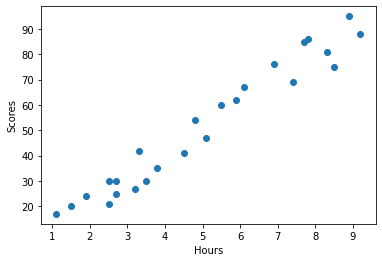

In [6]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], test_size=0.3, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [[9.71054094]]
Intercept: 
 [2.79419668]


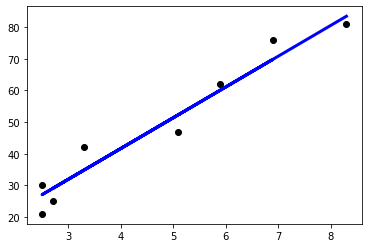

In [8]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)





In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % math.sqrt(mse))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean squared error: 23.62
Root mean squared error: 4.86
Mean absolute error: 4.50


### Regresja dla SBP.csv

In [10]:
df = pd.read_csv(r'SBP.csv')
df.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


Text(0, 0.5, 'SBP')

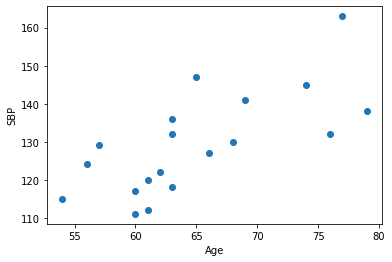

In [11]:
plt.scatter(df['Age'], df['SBP'])
plt.xlabel('Age')
plt.ylabel('SBP')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df[['SBP']], test_size=0.3, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [[1.44882707]]
Intercept: 
 [36.17936475]


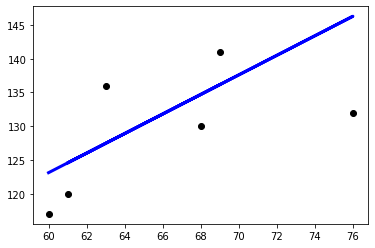

In [13]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [14]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % math.sqrt(mse))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean squared error: 63.49
Root mean squared error: 7.97
Mean absolute error: 7.18


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [15]:
df = pd.read_csv(r'Petrol.csv')
print(df.shape)
df.head()

(48, 5)


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']], df[['Zuzycie_paliwa']], test_size=0.3, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]
Intercept: 
 [513.1398382]


In [17]:
y_pred = reg.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % math.sqrt(mse))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean squared error: 8076.67
Root mean squared error: 89.87
Mean absolute error: 63.03


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [110]:
from sklearn.linear_model import LogisticRegression
from numpy import nan
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import classification_report

In [79]:
df = pd.read_csv(r'HEART.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [80]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [81]:
df.shape

(294, 14)

In [82]:
df.replace('?', nan, inplace=True)

In [83]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [84]:
df.drop(['slope','ca','thal'], axis=1, inplace=True)

In [85]:
df.shape
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [86]:
for column in df:
    index_del = df[column].index[df[column].isnull()]
    df.drop(index_del, axis=0, inplace=True)

In [94]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']], df[['num       ']], test_size=0.2, random_state=42)

In [101]:
print(y_train, X_train)


     num       
241           1
73            0
17            0
60            0
283           1
..          ...
21            0
215           1
79            0
123           0
119           0

[208 rows x 1 columns]      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak
241   54    1   3      120  237   0       0     150     1      1.5
73    45    0   4      132  297   0       0     144     0      0.0
17    36    1   3      112  340   0       0     184     0      1.0
60    43    0   2      120  201   0       0     165     0      0.0
283   47    1   4      160  291   0       1     158     1      3.0
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...
21    37    0   3      130  211   0       0     142     0      0.0
215   52    1   4      130  225   0       0     120     1      2.0
79    46    1   2      140  275   0       0     165     1      0.0
123   52    0   2      120  210   0       0     148     0      0.0
119   51    0   3      150  200   0       0    

In [107]:
logRegr = LogisticRegression(max_iter=10000)

In [108]:
logRegr.fit(X_train, column_or_1d(y_train))

LogisticRegression(max_iter=10000)

In [109]:
y_pred = logRegr.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.77      0.85      0.81        20

    accuracy                           0.85        53
   macro avg       0.84      0.85      0.84        53
weighted avg       0.85      0.85      0.85        53

